<a href="https://colab.research.google.com/github/AngieGD/ProyectoGrupaldeIA/blob/main/CodeProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="text-align: center; width: 100%; margin: 0 auto; padding: 10px;">
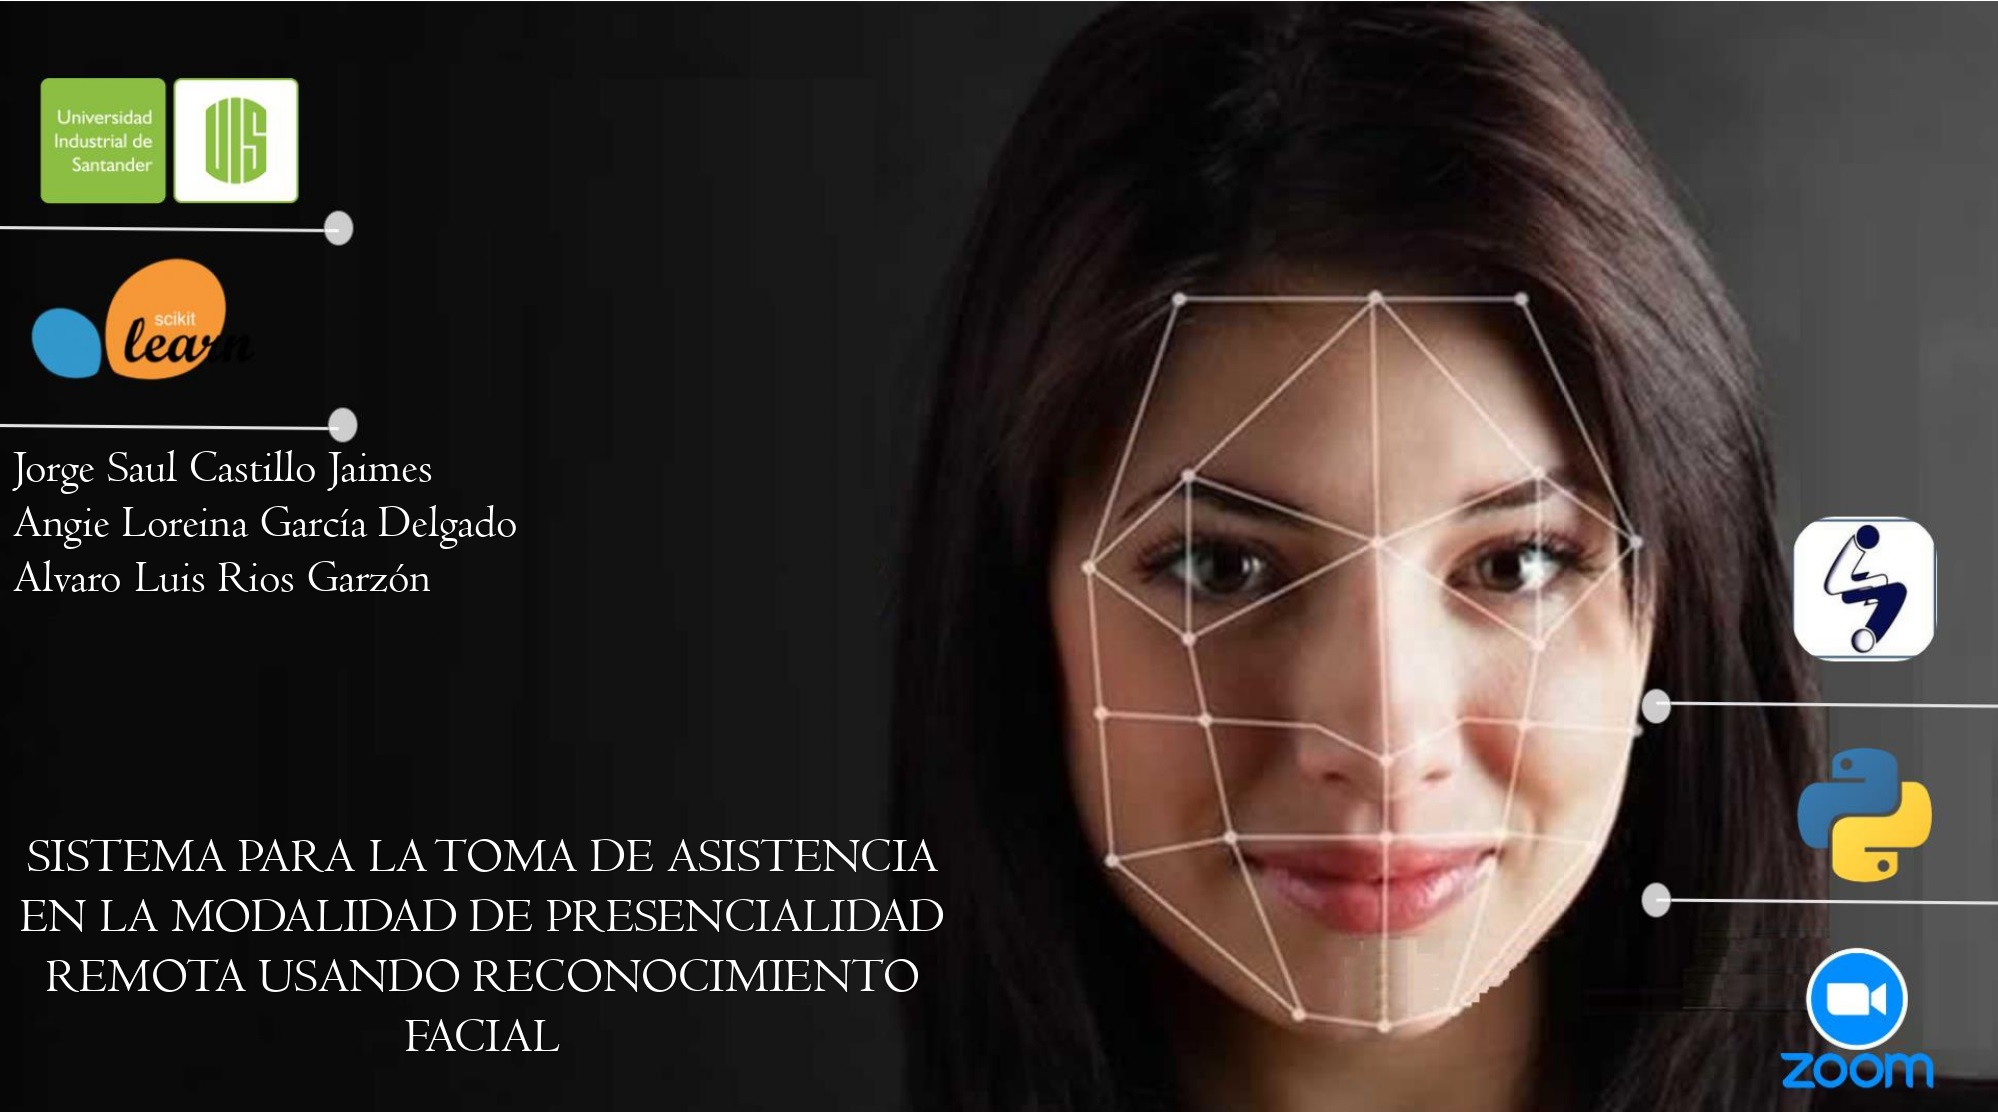
</div>

### Importación de librerías

In [ ]:
import os
from google.colab import drive
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import tensorflow as tf
import cv2 as cv
import matplotlib.pyplot as plt
import time

### Montaje del drive
Usando colab, se realiza montaje del Drive Google para extraer las imágenes almacenadas y que forman el dataset

In [ ]:
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/IA proyecto')
print(os.getcwd())

Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1osrjEYr9YwSKNh8TWl-TN89_KWI1Xd5s/IA proyecto


### Visualización del dataset
Ya teniendo acceso al dataset, se visualizan un par de imágenes que lo componen

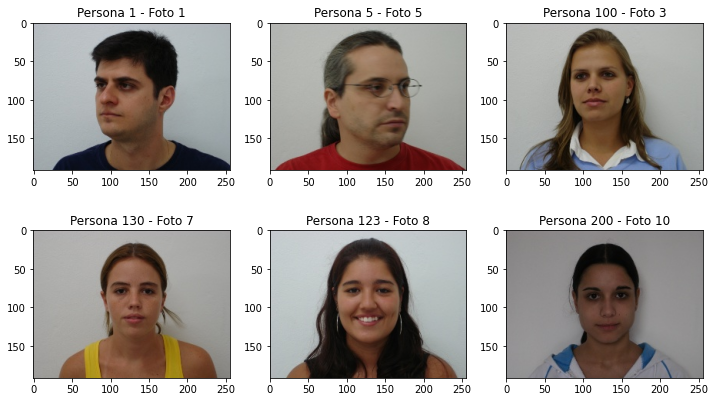

In [ ]:
datasetOrg = os.listdir("dataset")
datasetOrg.sort()
clases = []
y = []

# Sacar las clases
for i in datasetOrg:
    claseTmp = i.split("-")[0]
    y.append(int(claseTmp)-1)
    if not(claseTmp) in clases:
        clases.append(claseTmp)

# Abrir una imagen con openCV 
# Se visualizan 6 imagenes de prueba
plt.figure(figsize=(12,7))
plt.subplot(231)
img = cv.cvtColor(cv.imread("dataset/1-01.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img);
plt.title("Persona 1 - Foto 1");
plt.subplot(232)
img = cv.cvtColor(cv.imread("dataset/5-05.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img);
plt.title("Persona 5 - Foto 5");
plt.subplot(233)
img = cv.cvtColor(cv.imread("dataset/100-03.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img);
plt.title("Persona 100 - Foto 3");
plt.subplot(234)
img = cv.cvtColor(cv.imread("dataset/130-07.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img);
plt.title("Persona 130 - Foto 7");
plt.subplot(235)
img = cv.cvtColor(cv.imread("dataset/123-08.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img);
plt.title("Persona 123 - Foto 8");
plt.subplot(236)
img = cv.cvtColor(cv.imread("dataset/200-10.jpg"), cv.COLOR_BGR2RGB)
plt.imshow(img);
plt.title("Persona 200 - Foto 10");


### Detección del rostro y extracción
Se detecta el rostro en las imágenes y se extrae para tener mayor precisión.

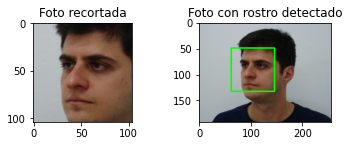

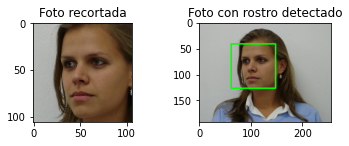

In [ ]:
# Detector de rostros
faceDet = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_default.xml")

for i in range(1, 201):
    foto = np.random.permutation(range(1, 11))
    for j in range(0, 10):
        nameImg = nameImg = str(i)+"-"+str(foto[j]).zfill(2)+".jpg"
        img = cv.cvtColor(cv.imread("dataset/"+nameImg), cv.COLOR_BGR2RGB)
        faces = faceDet.detectMultiScale(img,
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30,30),
        maxSize=(200,180))
        for (x,y,w,h) in faces:
            cropImg = img[y-10:y+h+10,x-10:x+w+10]
            cropImgView = cropImg.copy()
            cropImg = tf.image.per_image_standardization(cropImg)
            cropImg = tf.image.resize(cropImg, (224, 224))
            rectImg = img.copy()
            cv.rectangle(rectImg,(x,y),(x+w,y+h),(0,255,0),2)
        if j < 8:
            train_X.append(cropImg)
            train_Y.append(i)
        else:
            test_X.append(cropImg)
            test_Y.append(i)
    if i == 1:
        plt.subplot(221)
        plt.imshow(cropImgView)
        plt.title("Foto recortada")
        plt.subplot(222)
        plt.imshow(rectImg)
        plt.title("Foto con rostro detectado")
        plt.show()
    elif i == 100:
        plt.subplot(223)
        plt.imshow(cropImgView)
        plt.title("Foto recortada")
        plt.subplot(224)
        plt.imshow(rectImg)
        plt.title("Foto con rostro detectado")
        plt.show()

In [ ]:
print(train_Y)

['1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '4', '4', '4', '4', '4', '4', '4', '4', '5', '5', '5', '5', '5', '5', '5', '5', '6', '6', '6', '6', '6', '6', '6', '6', '7', '7', '7', '7', '7', '7', '7', '7', '8', '8', '8', '8', '8', '8', '8', '8', '9', '9', '9', '9', '9', '9', '9', '9', '10', '10', '10', '10', '10', '10', '10', '10', '11', '11', '11', '11', '11', '11', '11', '11', '12', '12', '12', '12', '12', '12', '12', '12', '13', '13', '13', '13', '13', '13', '13', '13', '14', '14', '14', '14', '14', '14', '14', '14', '15', '15', '15', '15', '15', '15', '15', '15', '16', '16', '16', '16', '16', '16', '16', '16', '17', '17', '17', '17', '17', '17', '17', '17', '18', '18', '18', '18', '18', '18', '18', '18', '19', '19', '19', '19', '19', '19', '19', '19', '20', '20', '20', '20', '20', '20', '20', '20', '21', '21', '21', '21', '21', '21', '21', '21', '22', '22', '22', '22', '22', '22', '22', '22', '23', '23', '23

In [ ]:
# Se convierten listas a arreglos estaticos
test_X = np.array(test_X)
test_Y = np.array(test_Y)
train_X = np.array(train_X)
train_Y = np.array(train_Y)

# Se visualiza los tamanos de cada arreglo
print(train_X.shape, " - ", train_Y.shape)
print(test_X.shape, " - ", test_Y.shape)

(1600, 224, 224, 3)  -  (1600,)
(400, 224, 224, 3)  -  (400,)


### Creación del modelo => DCNN
Se crea el modelo de la red neuronal convolucional profunda, basado en un modelo de AlexNet

In [ ]:
modelCre = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(200, activation='softmax')
])
modelCre.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001), metrics=['accuracy'])
modelCre.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)      

In [ ]:
modelCre.fit(train_X, train_Y, epochs=50, batch_size=10, validation_data=(test_X, test_Y))

Epoch 1/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
160/160 [==============================] - 2s 14ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accura

### Transfer Learning

In [ ]:
#Se crea el modelo con transfer learning
model = tf.keras.applications.VGG16(weights='imagenet')
newModel = tf.keras.models.Sequential(model.layers[:-1])
newModel.add(tf.keras.layers.Dense(200, activation='softmax'))
newModel.compile(loss='sparse_categorical_crossentropy', optimizer=tf.optimizers.SGD(lr=0.001, momentum=0.9), metrics=['accuracy'])
newModel.summary()

553467904/553467096 [==============================] - 15s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
____________________________________________________

In [ ]:
history = newModel.fit(train_X, train_Y, epochs=50, batch_size=10, validation_data=(test_X, test_Y))

Epoch 1/50
160/160 [==============================] - 18s 100ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/50
160/160 [==============================] - 16s 99ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/50
160/160 [==============================] - 16s 99ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/50
160/160 [==============================] - 16s 99ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/50
160/160 [==============================] - 16s 98ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/50
160/160 [==============================] - 16s 98ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/50
160/160 [==============================] - 16s 99ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - va

### Prueba con KNN

In [ ]:
train_knn_X = []
train_knn_Y = []
test_knn_X = []
test_knn_Y = []
for i in range(len(train_X)):
    flatImg = train_X[i].reshape(224*224*3)
    train_knn_X.append(flatImg)
for i in range(len(test_X)):
    flatImg = test_X[i].reshape(224*224*3)
    test_knn_X.append(flatImg)

train_knn_X = np.r_[train_knn_X]        
test_knn_X = np.r_[test_knn_X]
print(train_knn_X.shape)
print(test_knn_X.shape)

(1600, 150528)
(400, 150528)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knnImg = KNeighborsClassifier(n_neighbors=10)
knnImg.fit(train_knn_X, train_Y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
print("Precision KNN:",knnImg.score(test_knn_X, test_Y))

Precision KNN: 0.2175


### Prueba con DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

imgDT = DecisionTreeClassifier()
imgDT = imgDT.fit(train_knn_X,train_Y)

In [ ]:
print("Precision DT:",imgDT.score(test_knn_X,test_Y))

Precision DT: 0.29


### Prueba con SVM

In [ ]:
from sklearn.svm import SVC

imgSVM = SVC(kernel = 'linear', probability=True)
imgSVM.fit(train_knn_X, train_Y)
print(imgSVM.score(test_knn_X,test_Y))

0.71


In [ ]:
print("Precision SVM:",imgSVM.score(test_knn_X,test_Y))

Precision SVM: 0.71


### Prueba con imagen de Zoom

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

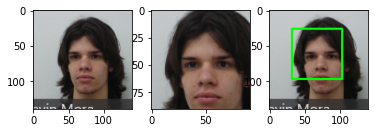

In [ ]:
k=0
j=0
py1=130
py2=270
px1=320
px2=460
imagenes=[]
for j in range(5):  
  for k in range(5):
    img = cv.cvtColor(cv.imread("../IA proyecto/Plantilla2.png"), cv.COLOR_BGR2RGB) # Es la de la plantilla
    imagenes.append(img[py1:py2, px1:px2])
    px1=px1+280
    px2=px2+280
  py1=py1+160
  py2=py2+160
  px1=320
  px2=460

  faces = faceDet.detectMultiScale(imagenes[1],
        scaleFactor=1.1,
        minNeighbors=5,
        minSize=(30,30),
        maxSize=(200,180));
  for (x,y,w,h) in faces:
    cropImg = imagenes[0][y-10:y+h+10,x-10:x+w+10];
    cropImgView = cropImg.copy();
    cropImg = tf.image.per_image_standardization(cropImg);
    cropImg = tf.image.resize(cropImg, (224, 224));
    rectImg = imagenes[0].copy();
    cv.rectangle(rectImg,(x,y),(x+w,y+h),(0,255,0),2);
    cropImg = np.array(cropImg);
  
  plt.subplot(131);
  plt.imshow(imagenes[0]);
  plt.subplot(132);
  plt.imshow(cropImgView);
  plt.subplot(133);
  plt.imshow(rectImg);

In [ ]:
testImg = (cropImg.copy()).reshape(1, 224, 224, 3)
testDCNN = modelCre.predict(testImg)
testTL = newModel.predict(testImg)
testImgKNN = testImg.reshape(1,224*224*3)
testKNN = knnImg.predict_proba(testImgKNN)
testDT = imgDT.predict_proba(testImgKNN)
testSVM = imgSVM.predict_proba(testImgKNN)

print("### "+"{:^69s}".format("Test para la primera imagen de Zoom")+" ###")
print("| Persona | DCNN | TL VGG16 ImageNet | KNN | DT Classifier | SVM Classifier |")
for i in range(200):
    print("|{:^9d}".format(i+1)+"|{:^6s}".format(str(testDCNN[0][i]))+"|{:^19s}".format(str(testTL[0][i]))+"|{:^05.1f}".format(testKNN[0][i]*100)+"|{:^15f}".format(testDT[0][i]*100)+"|{:^16.2f}".format(testSVM[0][i]*100)+"|")
print()
print("Mejor opcion KNN:",knnImg.predict(testImgKNN))
print("Mejor opcion DT:",imgDT.predict(testImgKNN))
print("Mejor opcion SVM:",imgSVM.predict(testImgKNN))

###                  Test para la primera imagen de Zoom                  ###
| Persona | DCNN | TL VGG16 ImageNet | KNN | DT Classifier | SVM Classifier |
|    1    | nan  |        nan        |00.00|   0.000000    |      0.85      |
|    2    | nan  |        nan        |00.00|   0.000000    |      0.29      |
|    3    | nan  |        nan        |00.00|   0.000000    |      0.23      |
|    4    | nan  |        nan        |00.00|   0.000000    |      0.41      |
|    5    | nan  |        nan        |00.00|   0.000000    |      0.20      |
|    6    | nan  |        nan        |00.00|   0.000000    |      0.14      |
|    7    | nan  |        nan        |00.00|   0.000000    |      0.43      |
|    8    | nan  |        nan        |00.00|   0.000000    |      0.75      |
|    9    | nan  |        nan        |00.00|   0.000000    |      0.16      |
|   10    | nan  |        nan        |00.00|   0.000000    |      0.68      |
|   11    | nan  |        nan        |00.00|   0.000000    |    

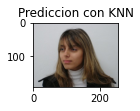

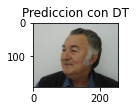

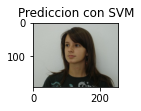

In [ ]:
plt.subplot(311)
plt.imshow(cv.cvtColor(cv.imread("dataset/189-01.jpg"), cv.COLOR_BGR2RGB))
plt.title("Prediccion con KNN")
plt.show()
plt.subplot(312)
plt.imshow(cv.cvtColor(cv.imread("dataset/30-01.jpg"), cv.COLOR_BGR2RGB))
plt.title("Prediccion con DT")
plt.show()
plt.subplot(313)
plt.imshow(cv.cvtColor(cv.imread("dataset/144-01.jpg"), cv.COLOR_BGR2RGB))
plt.title("Prediccion con SVM")
plt.show()